https://docs.opencv.org/trunk/d4/dc6/tutorial_py_template_matching.html

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from matplotlib import animation, rc
from IPython.display import HTML

from PIL import Image
import glob

In [2]:
def cv2_imshow(img):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.axis("off")
    plt.show()

In [3]:
# track = [23,88,66,55] # bound box of the object to track
# dataset_name = 'Car1'
# image_src = 'data/{}/img/*.jpg'.format(dataset_name)

In [4]:
track = [70,51,107,87] # bound box of the object to track
dataset_name = 'Car4'
image_src = 'data/{}/img/*.jpg'.format(dataset_name)

In [5]:
track = [73,126,29,23] # bound box of the object to track
dataset_name = 'CarDark'
image_src = 'data/{}/img/*.jpg'.format(dataset_name)

In [6]:
image_list = []  
for file in sorted(glob.glob(image_src)):
    image_list.append(file)

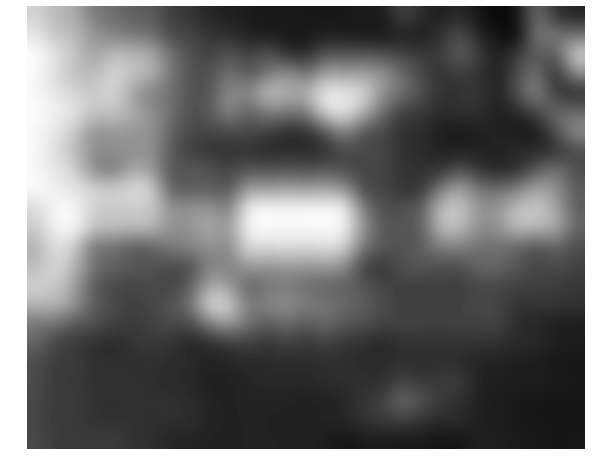

DONE


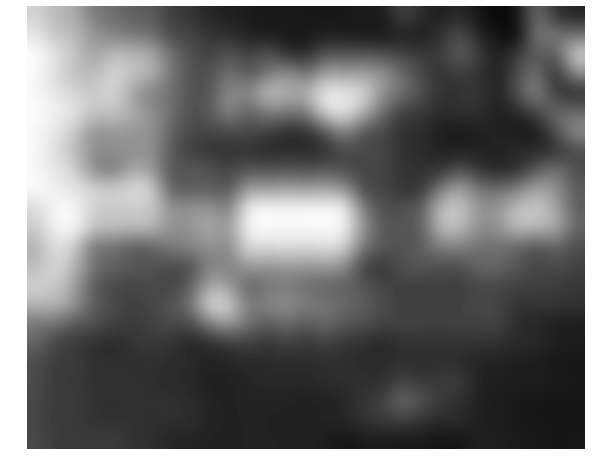

DONE


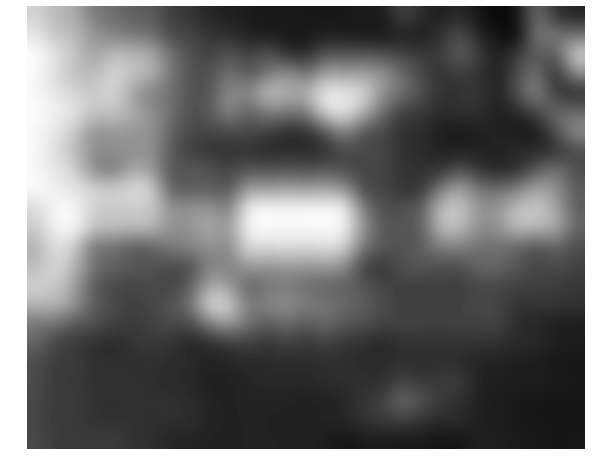

DONE


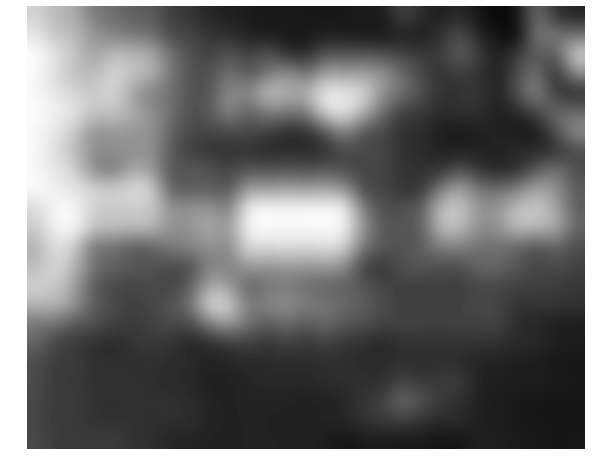

DONE


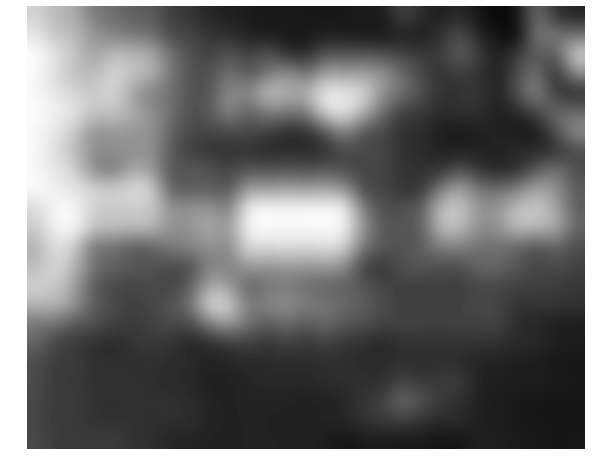

DONE


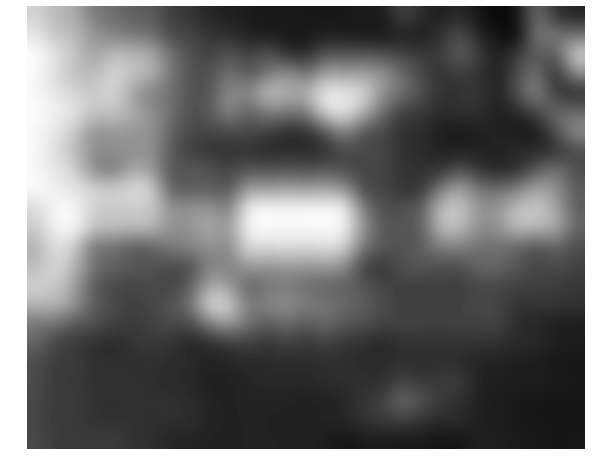

DONE


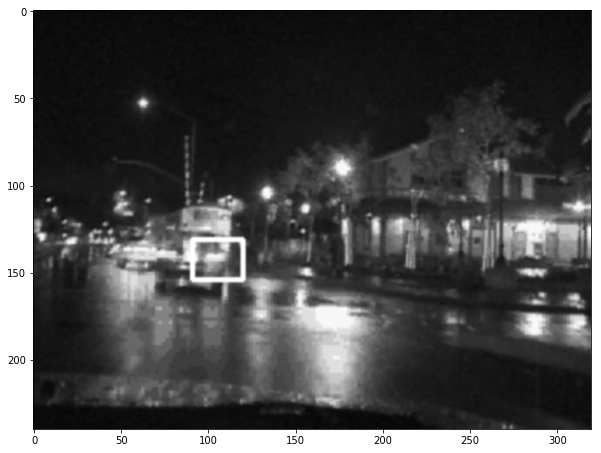

In [7]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    method = eval(meth)

    gray1 = cv.imread(image_list[0],0)
    template = gray1[track[1]:track[1]+track[3], track[0]:track[0]+track[2]]
    w, h = template.shape[::-1]
    cv2_imshow(template)

    fig = plt.figure()

    tracking_imgs = []
    for i in range(len(image_list)):  
        gray1 = cv.imread(image_list[i],0)

        # Apply template Matching
        res = cv.matchTemplate(gray1, template, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc

        # draw rectanle
        features_img = np.copy(gray1)
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(features_img, top_left, bottom_right, 255, 2)

        # save frames to create video
        im = plt.imshow(features_img, animated=True, cmap = 'gray', interpolation = 'bicubic')
        tracking_imgs.append([im])

    print('DONE')

    ani = animation.ArtistAnimation(fig, tracking_imgs, interval=500, blit=True,
                                    repeat_delay=1000)
    
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    ani.save('{}_template_matching_{}.mp4'.format(dataset_name, meth), writer=writer)

    #HTML(ani.to_html5_video())